In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.0.0


## tf.keras
### Linear regression 
#### Dataset:
https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression

In [4]:
data = pd.read_csv('../data/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


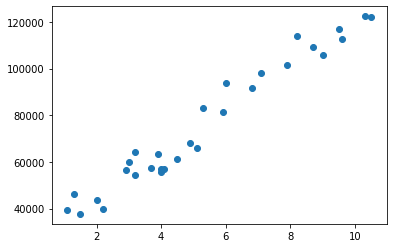

In [5]:
plt.scatter(data.YearsExperience, data.Salary)

In [6]:
x = np.asarray(data.YearsExperience)
y = np.asarray(data.Salary)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse'
)

In [18]:
history = model.fit(x, y, epochs=10)

Train on 30 samples
Epoch 1/100
30/30 [==============================] - 0s 6ms/sample - loss: 651050880.0000
Epoch 2/100
30/30 [==============================] - 0s 44us/sample - loss: 367168384.0000
Epoch 3/100
30/30 [==============================] - 0s 47us/sample - loss: 181749312.0000
Epoch 4/100
30/30 [==============================] - 0s 53us/sample - loss: 90082680.0000
Epoch 5/100
30/30 [==============================] - 0s 51us/sample - loss: 76821128.0000
Epoch 6/100
30/30 [==============================] - 0s 64us/sample - loss: 112884152.0000
Epoch 7/100
30/30 [==============================] - 0s 52us/sample - loss: 161716560.0000
Epoch 8/100
30/30 [==============================] - 0s 51us/sample - loss: 194640224.0000
Epoch 9/100
30/30 [==============================] - 0s 66us/sample - loss: 200392736.0000
Epoch 10/100
30/30 [==============================] - 0s 61us/sample - loss: 182091328.0000
Epoch 11/100
30/30 [==============================] - 0s 62us/sample - l

Epoch 91/100
30/30 [==============================] - 0s 54us/sample - loss: 31292450.0000
Epoch 92/100
30/30 [==============================] - 0s 48us/sample - loss: 31297898.0000
Epoch 93/100
30/30 [==============================] - 0s 53us/sample - loss: 31295398.0000
Epoch 94/100
30/30 [==============================] - 0s 76us/sample - loss: 31286856.0000
Epoch 95/100
30/30 [==============================] - 0s 63us/sample - loss: 31277358.0000
Epoch 96/100
30/30 [==============================] - 0s 67us/sample - loss: 31271766.0000
Epoch 97/100
30/30 [==============================] - 0s 54us/sample - loss: 31272046.0000
Epoch 98/100
30/30 [==============================] - 0s 42us/sample - loss: 31276570.0000
Epoch 99/100
30/30 [==============================] - 0s 41us/sample - loss: 31281688.0000
Epoch 100/100
30/30 [==============================] - 0s 54us/sample - loss: 31284104.0000


In [10]:
model.predict(x)

array([[ -1.4870002],
       [ -1.759182 ],
       [ -2.0313637],
       [ -2.7118185],
       [ -2.9840004],
       [ -3.936637 ],
       [ -4.072727 ],
       [ -4.344909 ],
       [ -4.344909 ],
       [ -5.025364 ],
       [ -5.297546 ],
       [ -5.4336367],
       [ -5.4336367],
       [ -5.5697274],
       [ -6.1140914],
       [ -6.658455 ],
       [ -6.930637 ],
       [ -7.202819 ],
       [ -8.019364 ],
       [ -8.155455 ],
       [ -9.244183 ],
       [ -9.652455 ],
       [-10.741182 ],
       [-11.149455 ],
       [-11.829909 ],
       [-12.238183 ],
       [-12.918637 ],
       [-13.0547285],
       [-14.007365 ],
       [-14.279547 ]], dtype=float32)

In [11]:
model.predict(pd.Series([5]))

array([[-6.794546]], dtype=float32)

### Multilayer Perception
#### Dataset:
https://www.kaggle.com/ashydv/advertising-dataset

In [19]:
data = pd.read_csv('../data/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


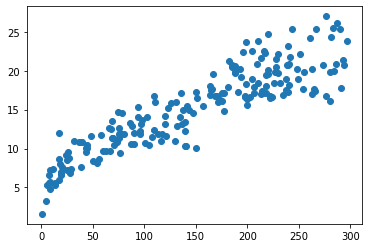

In [20]:
plt.scatter(data.TV, data.Sales)

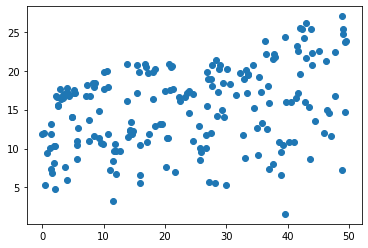

In [21]:
plt.scatter(data.Radio, data.Sales)

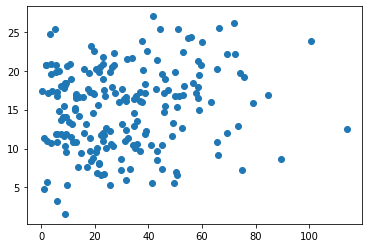

In [22]:
plt.scatter(data.Newspaper, data.Sales)

In [34]:
x = np.asarray(data.iloc[:, 0:-1])
y = np.asarray(data.iloc[:, -1])
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=(3,), activation='relu'),
        tf.keras.layers.Dense(1),
    ]
)

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mse'
)

In [37]:
history = model.fit(x, y, epochs=10)

Train on 200 samples
Epoch 1/10
200/200 [==============================] - 0s 1ms/sample - loss: 868.4718
Epoch 2/10
200/200 [==============================] - 0s 38us/sample - loss: 279.3135
Epoch 3/10
200/200 [==============================] - 0s 44us/sample - loss: 214.3626
Epoch 4/10
200/200 [==============================] - 0s 50us/sample - loss: 82.7852
Epoch 5/10
200/200 [==============================] - 0s 53us/sample - loss: 55.2952
Epoch 6/10
200/200 [==============================] - 0s 44us/sample - loss: 26.3968
Epoch 7/10
200/200 [==============================] - 0s 44us/sample - loss: 21.4967
Epoch 8/10
200/200 [==============================] - 0s 46us/sample - loss: 17.0042
Epoch 9/10
200/200 [==============================] - 0s 59us/sample - loss: 13.1131
Epoch 10/10
200/200 [==============================] - 0s 45us/sample - loss: 11.2170


In [39]:
x_test = np.asarray(data.iloc[:10, 0:-1])
y_test = np.asarray(data.iloc[:10, -1])
model.predict(x_test)

array([[22.459816],
       [10.752435],
       [ 9.686893],
       [16.48204 ],
       [17.799986],
       [ 9.432091],
       [ 7.198313],
       [10.382081],
       [ 1.027003],
       [16.938747]], dtype=float32)

In [41]:
y_test

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6])

### Logistic Regression
#### Dataset:

In [44]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4, input_shape=(15,), activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ]
)

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 64        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

### Softmax
#### Dataset: Fashion MNIST
https://www.kaggle.com/zalando-research/fashionmnist

In [47]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [48]:
print(f"Train, Image: {train_image.shape}, label: {train_label.shape}")
print(f"Test, Image: {test_image.shape}, label: {test_label.shape}")

Train, Image: (60000, 28, 28), label: (60000,)
Test, Image: (10000, 28, 28), label: (10000,)


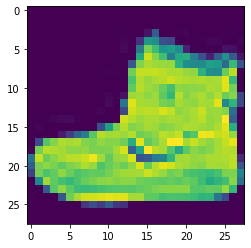

In [49]:
plt.imshow(train_image[0])

In [50]:
# Normalization
train_image = train_image/255
test_image = test_image/255

In [51]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)

In [52]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [53]:
model.fit(train_image, train_label, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4946 - accuracy: 0.8272
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3730 - accuracy: 0.8655
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3349 - accuracy: 0.8775
Epoch 4/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3130 - accuracy: 0.8859
Epoch 5/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2946 - accuracy: 0.8927


In [54]:
model.evaluate(test_image, test_label)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.37768625223636626, 0.8647]

In [58]:
# Onehot label
train_label_onehot = tf.keras.utils.to_categorical(train_label)
test_label_onehot = tf.keras.utils.to_categorical(test_label)
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [59]:
predict = model.predict(test_image)

In [60]:
predict.shape

(10000, 10)

In [61]:
predict[0]

array([2.5429259e-04, 8.3679570e-06, 3.1783376e-05, 3.6824807e-05,
       2.1077809e-05, 3.7614733e-02, 2.1274397e-04, 1.2614872e-01,
       4.7962833e-03, 8.3087516e-01], dtype=float32)